# 1.0降维算法

## 1.1 维度
针对表DataFrame，一个特征就是一个维度，对于图像来说，维度就是图像中的特征向量。
降维算法中的“降维”就是降低特征矩阵中的特征的数量

## 1.2 sklearn中的降维算法
sklearn中所有的降维算法都在`decomposition`模块中，这个模块本质是矩阵分解模块

| 类 | 说明 |
| :------: | :------: |
| **主成分分析** |   |
| decomposition.PCA | 主成分分析(PCA) |
| decomposition.IncrementalPCA | 增量主成分分析(IPCA) |
| decomposition.KernelPCA | 核主成分分析 |
| decomposition.MiniBatchSparsePCA | 小批量稀疏主成分分析 |
| decomposition.SparsePCA | 稀疏主成分分析 |
| decomposition.TruncatedSVD | 截断的SVD |
|  |   |
| **因子分析** |   |
| decomposition.FactorAnalysis | 因子分析(FA) |
|  |   |
| **字典学习** |   |
| decomposition.DictionaryLearning | 字典学习 |
| decomposition.MiniBatchDictionaryLearning | 小批量字典学习 |
| decomposition.dict_learning | 字典学习用于矩阵分解 |
| decomposition.dict_learning_online | 在线字典学习用于矩阵分解 |
|  |   |
| **高级矩阵分解** |   |
| *decomposition.LatentDirichletAllocation* | 具有在线变贝叶斯算法的隐含狄利克雷分布 |
| *decomposition.NMF* | 非负矩阵分解 |
|  |   |
| **其他矩阵分解** |   |
| decomposition.SparseCoder | 稀疏编码 |

# 2.0 PCA与SVD
在高维的数据中，必然会有一些特征不是有效特征（比如噪音）或者与其他特征是重复的。降维就是希望即能减少特征数量，又能保留大部分有效信息。

在特征选择中，有一种方法--方差过滤，就是通过样本的方差判断样本是否是有效信息，如果方差很小就说明是无效信息或信息量很小，方差大就说明特征有很多信息。
**在降维算法中，PCA使用的信息衡量标准就是样本方差，又称`可解释性方差`，方差越大，特征带有的信息量就越大**
$$Var=\frac{1}{n-1}\sum_{i=1}^n(x_i-\hat{x})^2$$
var代表一个特征的方差，n代表样本量，$x_i$代表特征中每个样本的取值，$\hat{x}$代表一列样本的均值

> 方差计算公式中为什么除数是n-1？这是为了得到样本方差的无偏估计


## 2.1 sklearn中PCA的实现
class `sklearn.sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)`
因为PCA函数的每个参数都涉及到了数学原理，所以还是要了解一下PCA算的原理。

![PCA01](pngs\PCA00.PNG)

有下面一列简单的数据，特征x1、x2, x1和x2分别作为两个特征向量，可以轻松的用二维平面来描述数据。每组数据的均值为2，方差等于
$$x_{1var}=x_{2var}=\frac{(1-2)^2+(2-2)^2+(3-2)^2}{3-1}=1$$
每个特征的数据相同，因此均值都为2, 方差都为1，总方差为2

现在有两个特征，如果想用1个特征来描述数据，即二维数组转换为一维数据，尽可能的保留信息量，即让数据的总方差尽量靠近2。
于是，将原来的直角坐标系逆时针旋转45°，形成了新的向量$x1^*$,$x2^*$组成新的平面，在这个新的平面中，三个样本数据的坐标可以表示为($\sqrt 2$,0),($2\sqrt 2$,0),($3\sqrt 2$,0)

![PCA01](pngs\PCA01.PNG)

可以注意到此时$x2^*$的值都变为了0，因此$x2^*$明显不带有任何有效信息，$x1^*$的均值为$2\sqrt 2$，而方差为
$$x_{1var}=\frac{(\sqrt 2-2\sqrt 2)^2+(2\sqrt 2-2\sqrt 2)^2+(3\sqrt 2-2\sqrt 2)^2}{3-1}=2$$
而此时因为$x2^*$的方差为0所以总方差也为0，所以减少了一个特征，但是信息量没有变化

一个降维算法的过程

| 过程 | 二维矩阵 | n维矩阵 |
| :------: | :------: | :------: |
| 1 | 输入原数据结果为(3,2)<br>找出原本2个特征的直角坐标系，<br>本质是找出两个特征构成二维平面 | 输入数据源，<br>结构为(m,n)找出原本的n个特征构成的n维空间v |
| 2 | 决定降维后的特征数量: 1 | 决定降维后的特征数量: k |
| 3 | 旋转，找出新的坐标系<br>本质是找出2个新的特征向量,以及它们构成的新二维平面<br>新特征向量让数据能被压缩到少数特征上，<br>并且总信息量不损失太多 | 通过某种变化，找出n个新的特征向量<br>以及它们构成的新n维空间v |
| 4 | 在新坐标轴上找出数据点，对应的2个新的坐标轴的坐标 | 找出原始数据在新空间V中的n个新特征向量上对应的值，<br>即"将数据映射到新空间中" |
| 5 | 选取第一个方差最大的向量，<br>删掉没有选中的特征，<br>成功将二维降到一维 | 选取前k个信息量最大的特征，<br>删掉没有选中的特征，<br>成功将n维空间降到k维 |

在步骤3中，`找出n个新特征，让数据能被压缩到少数特征上并且总信息量不损失太多的技术就是矩阵分解`。PCA和SVD是两总不同的降维算法

> 降维算法属于特征创造，特征选择是在原有的特征中选取特征，而特征创造是构造一个新的特征，新创造出来的特征不具有可读性，因此PCA一般不适用与探索特征与标签之间关系的模型，(如线性回归)。因此在线性回归模型中，一般使用特征选择

## 2.2 参数`n_components`
降维后需要的维度k，即降维后要保留的特征数量，范围是[0,min(X.shape)]，k是需要人为确认的超参数，既不能太大，也不能太小，太大没有实际意义，太小可能会损失信息。

从目标说起，如果希望可视化一组数据，往往降到三维以下，很多时候是二维，即n_components=2

### 2.2.1 案例--高维数据的可视化

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [7]:
iris = load_iris()
y = iris.target
x = iris.data
x.shape

(150, 4)

In [8]:
import pandas as pd
pd.DataFrame(x)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
pca = PCA(n_components=2)
pca.fit(x)
x_dr = pca.transform(x)

In [12]:
x_dr.shape

(150, 2)

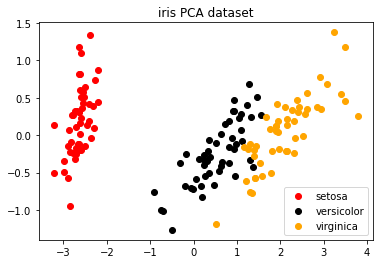

In [24]:
# x_dr[y == 0, 0]  # 通过bool索引分别根据y标签分别取出不同标签的数据
plt.figure()  # 创建画布
plt.scatter(x_dr[y==0, 0], x_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(x_dr[y==1, 0], x_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(x_dr[y==2, 0], x_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title("iris PCA dataset")
plt.show()

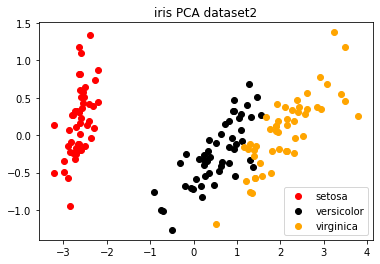

In [26]:
color = ["red", "black", "orange"]
plt.figure()
for i in set(y):
    plt.scatter(x_dr[y==i, 0], x_dr[y==i, 1], c=color[i], label=iris.target_names[i])
plt.legend()
plt.title("iris PCA dataset2")
plt.show()

观察这个图就可以预判到所有距离类的分类模型，KNN，随机森林等在这个模型上面的表现会很好

* 探索降维后的数据

In [27]:
# 属性explained_variance_,查看降维后每个特征所带信心量的大小(可解释性方差)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [28]:
# 属性explained_variance_ratio_,查看降维后的特征所带信息量占原始数据信息量的百分比
# 又叫可解释性方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [31]:
pca.explained_variance_ratio_.sum()  # 降维后信息贡献率占比，查看最终损失掉多少

0.977685206318795

* 选择最好的n_components

当参数n_components不填任何值，则返min(X.shape)个特征，样本量会大于特征数目，所以什么都不填相当转换了新空间但没有减少特征数量，通常不会这样操作。
但可以使用这种方式画出累计`可解释性方差贡献率曲线`，以此来选择n_components最好的整数取值

`累计可解释性方差贡献率曲线`是以降维后保留特征个数为横坐标，降维后特征捕捉到的可解释性方差贡献率为纵坐标，能帮助决定n_components的最好取值

In [32]:
pca_line = PCA().fit(x)
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [33]:
import numpy as np
np.cumsum(pca_line.explained_variance_ratio_)  # cumsum累加

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

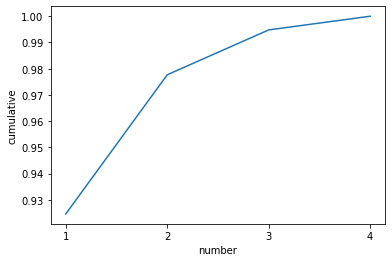

In [34]:
plt.plot([1,2,3,4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])  # 限制坐标轴显示整数
plt.ylabel("cumulative")
plt.xlabel("number")
plt.show()

### 2.2.2 最大似然估计自选超参数

除了输入整数，还可以输入`mle`作为n_components的参数，可以使用最大似然估计自动选择参数

In [35]:
pca_mle = PCA(n_components='mle')
x_mle = pca_mle.fit_transform(x)

In [38]:
x_mle.shape

(150, 3)

In [45]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

### 2.2.3 按信息量占比选超参数
输入[0,1]直接的浮点数，并设置参数`svd_solver='full'`，意思是自动选择总解释方差大于这个浮点数的特征个数,比如n_components=0.97，意思是只要解释性方差大于等于0.97，自动选择达到这个数值的参数个数

In [46]:
pca_f = PCA(n_components=0.98, svd_solver='full')
pca_f = pca_f.fit(x)
x_f = pca_f.transform(x)

In [47]:
x_f.shape

(150, 3)

In [48]:
pca_f.explained_variance_ratio_.sum()

0.9947878161267247

## 2.3PCA中的SVD
PCA，SVD在进行数据矩阵分解时要进行大量的矩阵计算，**但是SVD有一个数学性质--可以不计算协方差矩阵，直接找到新特征向量**，组成n维空间，而这个n维空间就是奇异值分解后的右矩阵$V^T$。也就是说SVD在矩阵分解时可以有一个比PCA简单非常多的数学过程得到$V^T$，而有奇异矩阵$V^T$有一个特征：
$$X_{dr}=X*V[:k]$$
k,就是n_components。**就是说，奇异值分解可以不计算协方差矩阵等结构复杂冗长的矩阵，就可以直接求出特征空间和降维后的特征矩阵**。SVD在矩阵分解中的过程比PCA简单快速。查看V(k,n),可以说使用components_

In [50]:
pca_f.components_  # V(k, n)

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [51]:
pca_f.components_.shape

(3, 4)

### 2.3.2 参数svd_solver与random_state
参数svd_solver在降维过程中，用来控制矩阵分解的一些细节的参数有四个可选项,`full`,`arpack`,`randomized`,`auto`,默认为auto

* `full`, 从`scipy.linalg.svd`中调用标准的LAPACK分解器来生成精确完整的SVD，**适合计算量中等，计算时间充足的情况**,生成精确完成的SVD结构:$$U_{(m,m)},\Sigma_{(m,n)},V_{(n,n)}^T$$
* `arpack`, 从`scipy.sparse.linalg.svds`调用ARPACK分解器来运行截断奇异值分解，分解时就讲特征数量降到n_components中输入的k，**可以加快运行速度，适合特征矩阵很大的时候，但一般用于矩阵为稀疏矩阵的情况**，此过程包含一定的随机性。截断后的SVD分解出的结果为：$$U_{(m,k)},\Sigma_{(k,k)},V_{(n,n)}^T$$
* `randomized`，随机方法进行随机SVD。**适合特征矩阵巨大，计算量庞大的情况**
* `auto`, 基于X.shape,n_components的默认策略选择分解器，如果输入数据的尺寸大于500*500而且要提取的特征数小于最小维度min(X.shape)的80%，就启用randomized，否则使用精确完整的SVD计算，截断将会在矩阵被分解完成后有选择的发生

`random_state`在参数svd_solver的值为arpack，randomized时生效，可以控制两组SVD模式中的随机模式，一般设置为auto

> 通常情况下svd_solver选择auto，如果auto算不出来选randomized

### 2.3.3 属性 `components_`

components_是用来查询V(k,n)的，通常降维后的矩阵是不可读的，但是如果原数据是图像，那还是可以通过components_保持的V(k,n)查看图像，找到与原图直接的联系

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [4]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [7]:
faces.data.shape  # 是本质特征矩阵
# 行是样本
# 列是样本相关的所有特征

(1348, 2914)

In [8]:
faces.images.shape  # 用来画图的矩阵
# 1348是样本个数
# 62是每个图像特征矩阵的样本
# 47是特征矩阵的特征
# 62*47 = 2914，images中的行列等于data中的列

(1348, 62, 47)

In [9]:
faces.data.shape

(1348, 2914)

In [10]:
X = faces.data

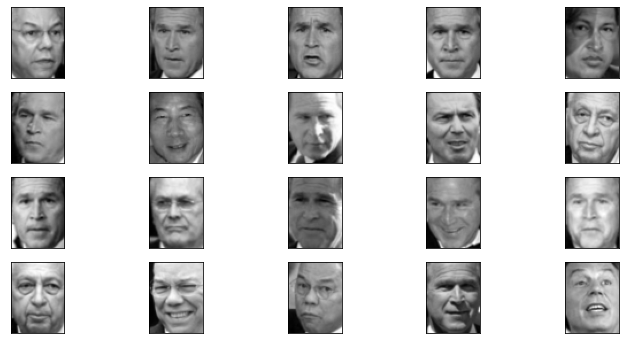

In [26]:
# 数据本身是图像和数据本身是数字的可视化方法是不同的

# 创建画布, subplots专门用来画子图的函数
fig, axes = plt.subplots(4,5
                        , figsize=(12,6)
                        , subplot_kw={"xticks":[], "yticks":[]}  # 不显示坐标
                        )
# axes[0][0].imshow(faces.images[2,:,:])
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i, :, :], cmap="gray")

In [35]:
pca = PCA(n_components=150).fit(X)
X_dr = pca.transform(X)
X_dr.shape

(1348, 150)

In [28]:
V = pca.components_

In [31]:
V.shape

(150, 2914)

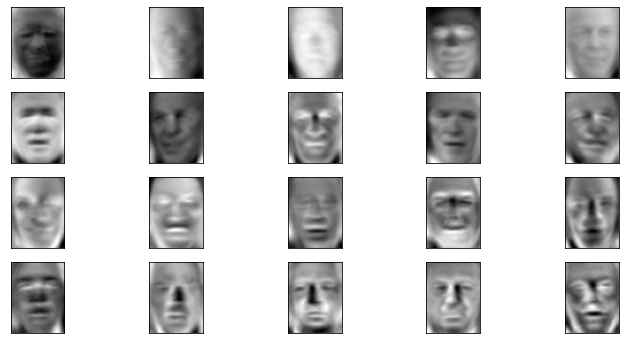

In [34]:
# 看一下降维后的图像
fig0, axes0 = plt.subplots(4,5
                          , figsize=(12,6)
                          , subplot_kw={"xticks":[], "yticks":[]}
                          )
for i, ax in enumerate(axes0.flat):
    ax.imshow(V[i, :].reshape(62,47), cmap="gray")

可以看到在图像识别中重要的信息是无关和光线相关的信息

## 2.4.1 inverse_transform
数据降维是不可逆的，因为降维损失掉的数据不可恢复

In [36]:
X_dr.shape  # 降维后的矩阵

(1348, 150)

In [37]:
X.shape  # 原矩阵

(1348, 2914)

In [38]:
# 将降维后的矩阵恢复成原矩阵
X_inverse = pca.inverse_transform(X_dr)

In [39]:
X_inverse.shape

(1348, 2914)

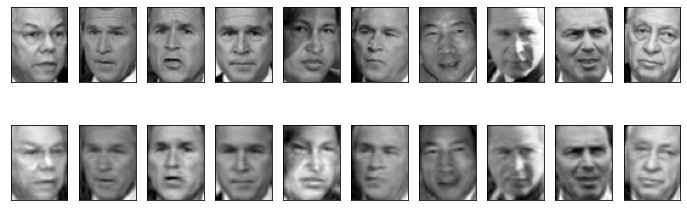

In [56]:
fig, axes = plt.subplots(2,10, figsize=(12,4), subplot_kw={"xticks":[], "yticks":[]})

for i in range(10):
    axes[0, i].imshow(faces.images[i, :, :], cmap="binary_r")
    axes[1, i].imshow(X_inverse[i].reshape(62, 47), cmap="binary_r")

可以看到恢复后的数据损失掉了一部分数据，没有原图像清晰

### 2.4.2 用PCA做噪音过滤
降维的目的之一就是去掉模型带来负面影响的特征，而inverse_transform可以恢复到高纬空间，但是有舍弃掉了影响很小的特征

手写识别案例

In [57]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot
import numpy as np

In [58]:
digits = load_digits()

In [60]:
digits.data.shape

(1797, 64)

In [61]:
set(digits.target.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [65]:
def plot_digits(data):
    """
    data必须是(m*n)，并且n必须是8*8
    """
    fig0, axes0 = plt.subplots(4,10
                              , figsize=(10,4)
                              , subplot_kw={"xticks":[], "yticks":[]}
                              )
    for i, ax in enumerate(axes0.flat):
        ax.imshow(data[i].reshape(8,8), cmap="gray")

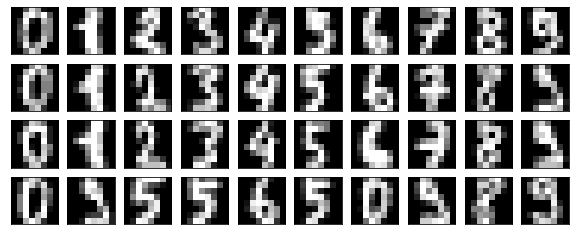

In [66]:
plot_digits(digits.data)

In [67]:
# 原数据太完美，添加噪音
rng = np.random.RandomState(42)

noisy = rng.normal(digits.data, 2)

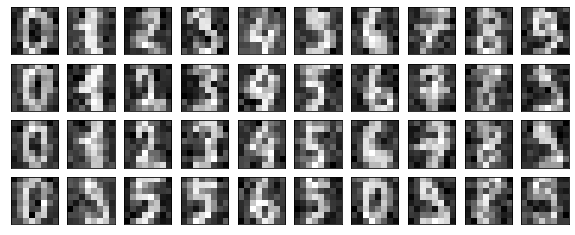

In [68]:
plot_digits(noisy)

In [75]:
pca = PCA(0.5).fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

(1797, 6)

In [76]:
without_noisy = pca.inverse_transform(X_dr)

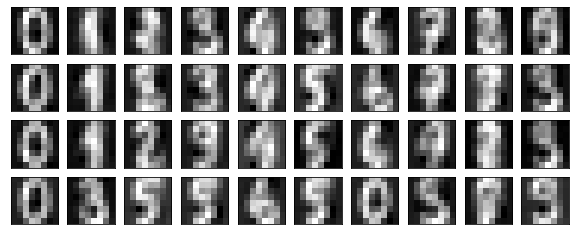

In [77]:
plot_digits(without_noisy)

## 2.5 重要参数总结

参数 n_components，svd_solver，random_state
* `n_components`降维后新矩阵的维度
* `svd_solver`svd与pca联合降维
* `random_state`与svd_solver联合控制随机降维的参数

属性 components, explained_variane, explained_variance_ratio
* `components`查看降维后V(k,n)
* `explained_variane`可解释方差
* `explained_variance_ratio`可解释方差贡献率

# 手写数据案例

1. 导入包

In [78]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2. 导入数据

In [79]:
data = pd.read_csv(r'D:\data\learn\digit recognizor\train.csv\train.csv')

In [84]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [83]:
X.shape

(42000, 784)

3. 画累计方差贡献率曲线，找到最佳降维后维度范围

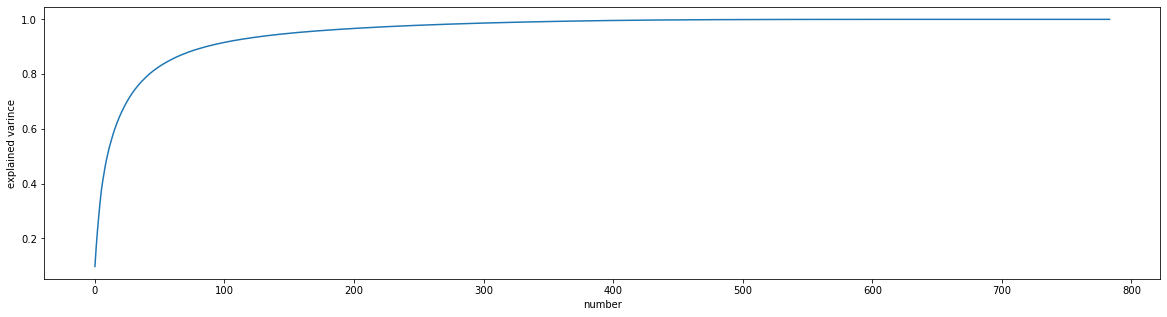

In [86]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number")
plt.ylabel("explained varince")
plt.show()

> 选择转折点，可以看到转折点在0-100之间

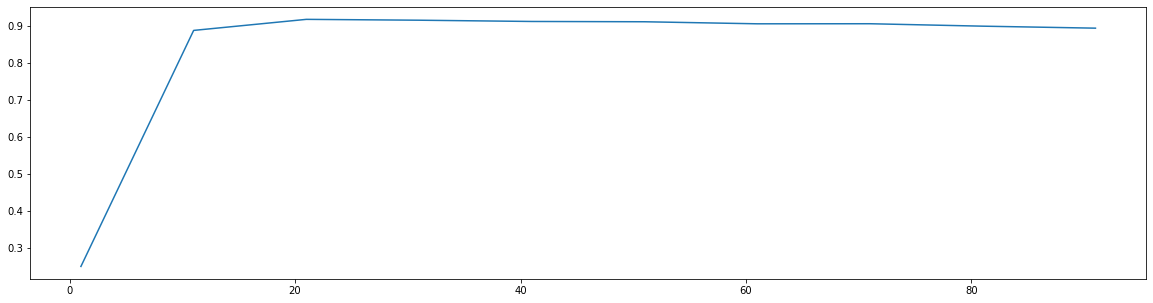

In [87]:
score = []
for i in range(1, 101, 10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 101, 10), score)
plt.show()

> 最高点在20左右

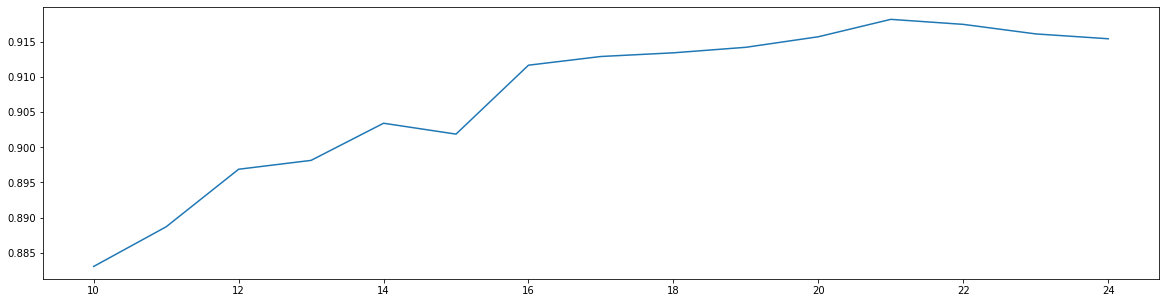

In [88]:
score = []
for i in range(10, 25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(10, 25), score)
plt.show()

In [89]:
X_dr = PCA(n_components=21).fit_transform(X)

In [90]:
X_dr.shape

(42000, 21)

In [91]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()

0.9178333333333333

In [92]:
cross_val_score(RFC(n_estimators=100, random_state=0), X_dr, y, cv=5).mean()

0.9438809523809525

> 尝试更换算法，尝试使用KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [95]:
cross_val_score(KNN(), X_dr, y, cv=5).mean()

0.9675476190476189

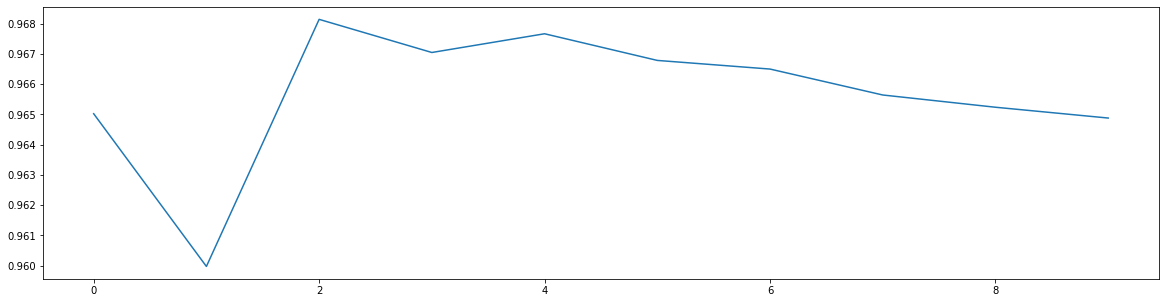

In [97]:
score = []
for i in range(10):
    X_dr = PCA(21).fit_transform(X)
    once = cross_val_score(KNN(i+1), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(10), score)
plt.show()

In [98]:
cross_val_score(KNN(3), X_dr, y, cv=5).mean()

0.9681428571428571